<a href="https://colab.research.google.com/github/SaxenaVaishnavi/Machine-Learning-Techniques/blob/main/Week_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Week-9


## Dataset

Run the cell given below to generate the data-matrix $\mathbf{X}$, which is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features.

**Do not edit this cell.**

In [9]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=50, n_features=2, n_informative = 2, n_redundant = 0, n_clusters_per_class = 1, flip_y = 0, class_sep = 3, random_state=20)

## Problem 1
How many samples are there in the dataset?



In [4]:
# Solution
X.shape[0]

50

## Problem 2

How many features are there in the dataset?


In [5]:
# Solution
X.shape[1]

2

## Problem 3
In the target vector $y$, replace all occurrences of 0 with -1.

How many unique classes are there in the target vector?



In [6]:
y

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0])

In [10]:
# Solution
y = np.where(y == 0, -1, y)
unique_classes = np.unique(y)
print(f"Unique classes in target vector: {unique_classes}")

Unique classes in target vector: [-1  1]


## Problem 4
Plot the data keepig first feature on the x-axis and the second feature on the y-axis. Plot the data points belonging to each class in different colors. Does the data seem linearly separable?

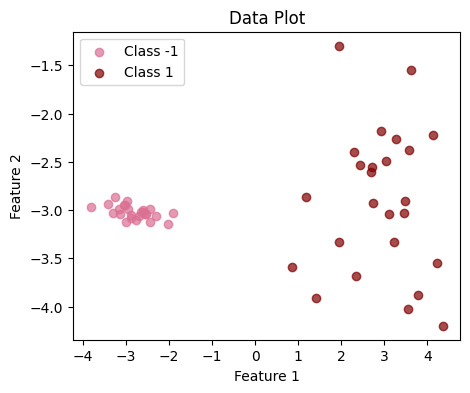

In [20]:
# Solution
colors = {-1: 'palevioletred', 1: 'maroon'}
plt.figure(figsize=(5, 4))
for label in unique_classes:
    plt.scatter(X[y == label, 0], X[y == label, 1], color=colors[label], label=f'Class {label}', alpha=0.7)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Data Plot")
plt.legend()
plt.show()

## Problem 5

Initialize w to be a zero vector, with shape equal to the number of features in the data.

Iterate over each data point $x$ in $X$ one by one (in the same sequence as present in $X$). For each data point, compute the value of $w^Tx$. If $w^Tx \ge 0$, predict positive class for $x$, else predict the negative class.

If prediction does not match the actual class label, update the weight vector as per the following update rule:
$$w_{new} = w_{old} + xy$$ where $x$ is the data point and $y$ is the actual label of $x$.

Run the above for 10 epochs (iterations), but stop if there are no weight updates in an epoch.

Notice in which iteration, the number of weight updates becomes zero for the first time.



In [21]:
# Solution
w = np.zeros(X.shape[1])

# Perceptron algorithm
epochs = 10
for epoch in range(epochs):
    weight_updates = 0
    for i in range(X.shape[0]):
        x = X[i]
        y_actual = y[i]
        prediction = 1 if np.dot(w, x) >= 0 else -1
        if prediction != y_actual:
            w += x * y_actual  # Update rule
            weight_updates += 1
    print(f"Epoch {epoch + 1}: Weight updates = {weight_updates}")
    if weight_updates == 0:
        print(f"Number of weight updates became zero at epoch {epoch + 1}.")
        break

Epoch 1: Weight updates = 2
Epoch 2: Weight updates = 0
Number of weight updates became zero at epoch 2.


In [22]:
print(w)

[ 6.08372134 -0.97979197]


## Problem 6
Plot the vector w and the decision boundary thus obtained.



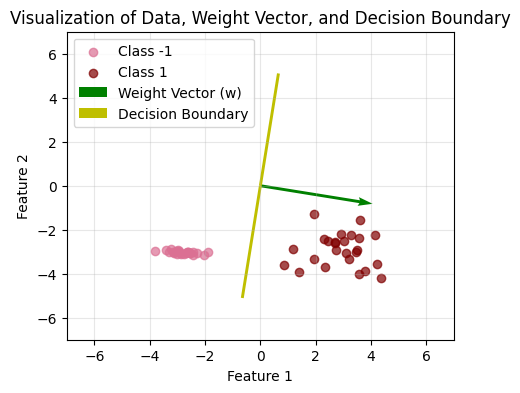

In [33]:
# Solution
plt.figure(figsize=(5,4))

# Scatter plot for the data points
plt.scatter(X[:, 0][y == -1], X[:, 1][y == -1], c='palevioletred', alpha=0.7, label='Class -1')
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], c='maroon', alpha=0.7, label='Class 1')

# Vector for the weight (w)
plt.quiver(0, 0, w[0], w[1], scale=21, color='g', label='Weight Vector (w)')

# Decision boundary (perpendicular to w)
plt.quiver(0, 0, -w[1], w[0], scale=21, color='y', headaxislength=0, headlength=0, label='Decision Boundary')
plt.quiver(0, 0, w[1], -w[0], scale=21, color='y', headaxislength=0, headlength=0)

plt.xlim(-7, 7)
plt.ylim(-7, 7)

plt.grid(alpha=0.3)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Visualization of Data, Weight Vector, and Decision Boundary')
plt.legend(loc='upper left')
plt.show()

## Problem 7
What is the value of loss using the weight vector obtained earlier?  


In [34]:
# Solution
# The perceptron loss function is the number of misclassified examples.
loss = sum(
    1 for i in range(X.shape[0]) if (np.dot(w, X[i]) >= 0 and y[i] == -1) or (np.dot(w, X[i]) < 0 and y[i] == 1)
)
print(f"Perceptron loss: {loss}")

Perceptron loss: 0


## Problem 8
Now use the following data set, replace occurrences of 0 with -1 and visualize.

**Do not edit the following cell.**



In [35]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=50, n_features=2, n_informative = 2, n_redundant = 0, n_clusters_per_class = 1, flip_y = 0.1, class_sep = 2, random_state=20)

In [36]:
# Solution
# Replacing 0 with -1 in the target vector
y = np.where(y == 0, -1, y)

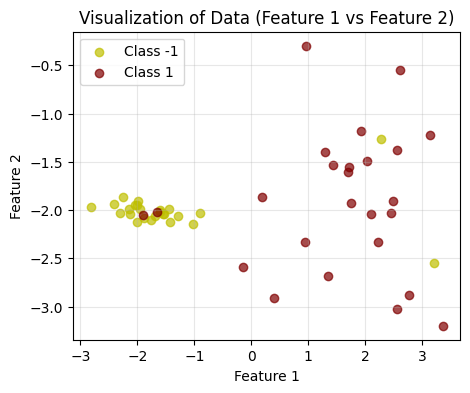

In [53]:
plt.figure(figsize=(5, 4))
plt.scatter(X[:, 0][y == -1], X[:, 1][y == -1], c='y', label='Class -1', alpha=0.7)
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], c='maroon', label='Class 1', alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Visualization of Data (Feature 1 vs Feature 2)')
plt.legend(loc='upper left')
plt.grid(alpha=0.3)
plt.show()

## Problem 9

Apply the Perceptron code again.

What is the number of weight updates performed in epoch 10?



In [45]:
# Solution
weights = np.zeros(X.shape[1])
epochs = 10
total_misclassifications = 0
updates_per_epoch = {}

# Perceptron algorithm
for epoch in range(epochs):
    updates_per_epoch[epoch] = 0
    print(f"Epoch {epoch + 1}: ", end="")

    for i in range(len(X)):
        # Predict the class label
        prediction = 1 if np.dot(weights, X[i]) >= 0 else -1

        # Update weights if prediction is incorrect
        if prediction != y[i]:
            weights += y[i] * X[i]  # Update rule
            total_misclassifications += 1
            updates_per_epoch[epoch] += 1

    # Print updates for this epoch
    print(f"Weight Updates: {updates_per_epoch[epoch]}")

    # Early stopping if no updates
    if updates_per_epoch[epoch] == 0:
        print("Training converged.")
        break

print(f"Total Misclassifications: {total_misclassifications}")

Epoch 1: Weight Updates: 13
Epoch 2: Weight Updates: 11
Epoch 3: Weight Updates: 12
Epoch 4: Weight Updates: 11
Epoch 5: Weight Updates: 11
Epoch 6: Weight Updates: 10
Epoch 7: Weight Updates: 11
Epoch 8: Weight Updates: 11
Epoch 9: Weight Updates: 11
Epoch 10: Weight Updates: 11
Total Misclassifications: 112


## Problem 10
Visualize the weight vector and the decision boundary.



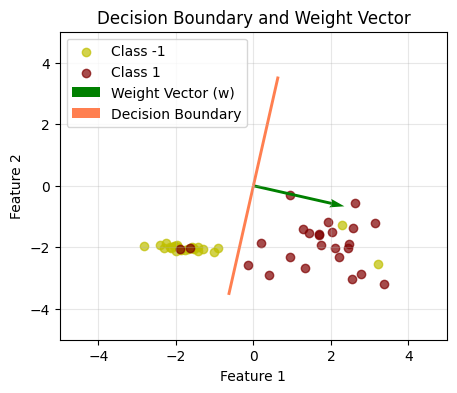

In [86]:
# Solution
plt.figure(figsize=(5, 4))

# Scatter plot for data points
plt.scatter(X[:, 0][y == -1], X[:, 1][y == -1], color='y', label='Class -1', alpha=0.7)
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], color='maroon', label='Class 1', alpha=0.7)

# Plot the weight vector
plt.quiver(0, 0, weights[0], weights[1], scale=12, color='green', label='Weight Vector (w)')
plt.quiver(0, 0, -weights[1], weights[0], scale=10, color='coral', headaxislength=0, headlength=0, label='Decision Boundary')
plt.quiver(0, 0, weights[1], -weights[0], scale=10, color='coral', headaxislength=0, headlength=0)

plt.title('Decision Boundary and Weight Vector')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper left')
plt.grid(alpha=0.3)

plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.show()